In [1]:
import sys
sys.path.append("..")
import plots
import matplotlib.pyplot as plt
import numpy as np

# Parameters

In [108]:
# Masses
M = 1
m1 = 0.4*M
m2 = 0.2*M
m3 = 0.4*M

# Length
l1  = 2
l2 = 0.4
l3 = 0.4

# Moments
N = m3*l3 - m2*l2
I_1 = M * l1**2
I_2 = m2 * l2**2 + m3 * l3**2

# Constants
theta_0 = .7
g = 9.8
T = 2 * np.pi * np.sqrt(l1 / g)
omega = 2*np.pi / T

# Other params
K_0 = M*l1*g - N*g*(1 - 1/4 * theta_0**2)
I_0 = I_1 + I_2 - 2*l1*N*(1 - 1/4 * theta_0**2)
omega_0 = np.sqrt(K_0 / I_0)
F = theta_0 * (omega**2*I_2 + N*(g - omega_0**2*l1)*(1 - 1/8 * theta_0**2))/I_0
A = - N*g*theta_0**2 / (4 * I_0)
B = l1 * N * omega * theta_0**2 / I_0
C = -l1 * N * theta_0**2 /(2*I_0)


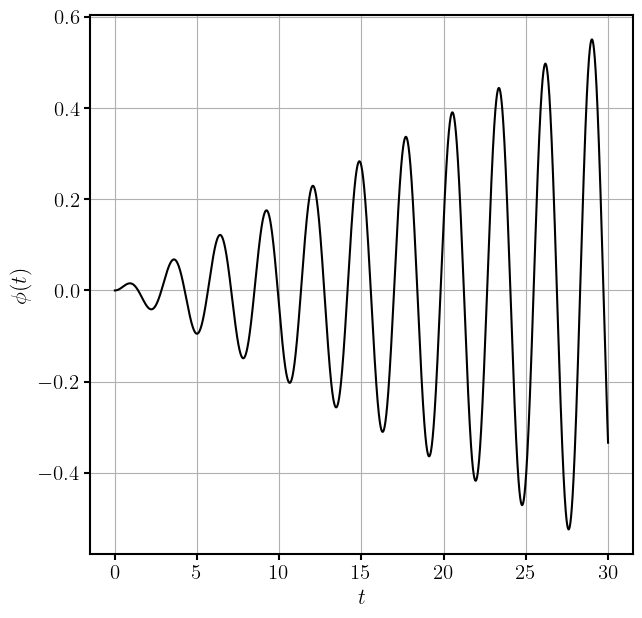

In [109]:
t = np.linspace(0, 30, 10_000)
phi = (F/(omega_0**2 - omega**2)) * (np.cos(omega*t) - np.cos(omega_0*t))
# phi2 = F*t / (2*omega_0) * np.sin(omega_0*t)
plt.plot(t, phi)
# plt.plot(t, phi2)
plt.xlabel("$t$", size=16)
plt.ylabel("$\phi(t)$", size=16)
plt.savefig("../../docs/swing/phi_t.svg")

F

$$
\begin{cases}
d(t) =h \sin\phi(t) + \frac{v^2 \sin\phi(t)\cos\phi(t)}{g} +\sqrt{\frac{2hv^2\cos^2\phi(t)(1-\cos\phi(t))}{g}+\left(\frac{v(t)^2\sin\phi(t)\cos\phi(t)}{g}\right)^2} \\
\phi(t) = \left(\frac{F}{\omega_0^2 - \omega^2}\right)\left(\cos \omega t - \cos \omega_0t\right) \\
v(t) = \frac{l_1F}{\omega^2_0 - \omega^2}(\omega\cos\omega t - \omega_0\cos \omega_0 t)
\end{cases}
$$

In [122]:
def v(t):
    return (l1*F/(omega_0**2-omega**2) * (omega*np.cos(omega*t) - omega_0*np.cos(omega_0*t)))
    
def phi(t):
    return F/(omega_0**2-omega**2) * (np.cos(omega*t) - np.cos(omega_0*t))
    
def d(t):
    if phi(t) > 0:
        return (l1*np.sin(phi(t)) 
                + v(t)**2*np.sin(phi(t))*np.cos(phi(t))/g 
                + np.sqrt(2*l1*v(t)**2*np.cos(phi(t))**2*(1-np.cos(phi(t)))/g + (v(t)**2*np.sin(phi(t))*np.cos(phi(t))/g)**2)
                )
    return (l1*np.sin(phi(t)) 
        + v(t)**2*np.sin(phi(t))*np.cos(phi(t))/g 
        - np.sqrt(2*l1*v(t)**2*np.cos(phi(t))**2*(1-np.cos(phi(t)))/g + (v(t)**2*np.sin(phi(t))*np.cos(phi(t))/g)**2)
        )


In [123]:
ts = np.linspace(0, 30, 10_000)
distances = np.array([d(t) for t in ts])
max_distances = []
max_t = []

for index, _ in enumerate(distances):
    try:
        max_index = np.argmax(distances[:index])
    except:
        max_index = 0
    max_distances.append(distances[max_index])
    max_t.append(ts[max_index])

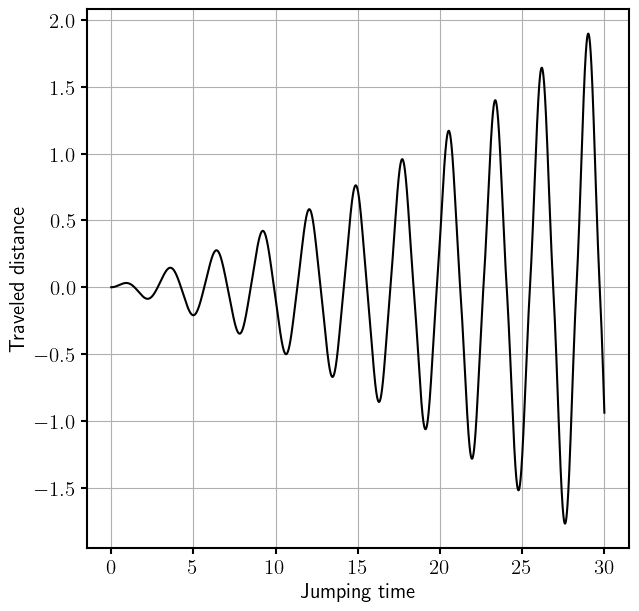

In [124]:
plt.plot(ts, distances)
plt.xlabel("Jumping time")
plt.ylabel("Traveled distance")
plt.savefig("../../docs/swing/distance_vs_t.svg")

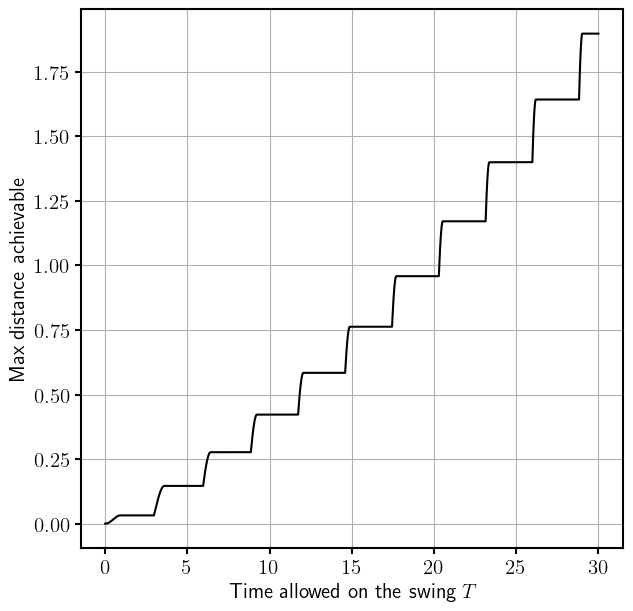

In [125]:
plt.plot(ts, max_distances)
plt.xlabel("Time allowed on the swing $T$")
plt.ylabel("Max distance achievable")
plt.savefig("../../docs/swing/max_distance.svg")

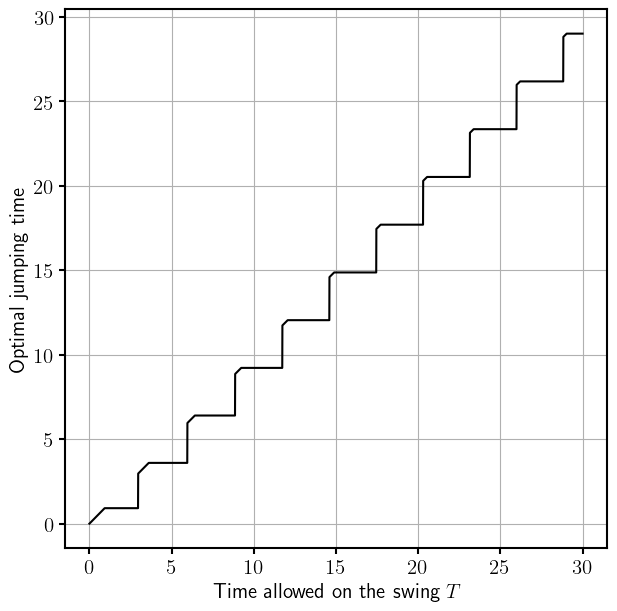

In [126]:
plt.plot(ts, max_t)
plt.xlabel("Time allowed on the swing $T$")
plt.ylabel("Optimal jumping time")
plt.savefig("../../docs/swing/optimal_time.svg")